In [38]:
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from keras.preprocessing.sequence import pad_sequences

In [39]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        results[i, sequences[i]] = 1
    return results

(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=10000)
Xtrain = vectorize(Xtrain)

In [40]:
word_index = imdb.get_word_index()  # Get the word index used by the IMDB dataset

In [41]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [54]:
def kmeans_clustering(reviews, n_clusters=5):
    # Apply PCA to reduce dimensionality for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(reviews)
    
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reduced_data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # Assign labels based on centroids
    centroid_distances = []
    for i in range(n_clusters):
        centroid_distances.append(np.linalg.norm(reduced_data[labels == i] - centroids[i], axis=1))
    
    # Determine label based on minimum distance to centroid
    cluster_labels = []
    for i in range(n_clusters):
        if np.mean(centroid_distances[i]) < np.mean(centroid_distances[1 - i]):
            cluster_labels.append("Positive")
        else:
            cluster_labels.append("Negative")
    
    # Plot the clusters with labels
    plt.figure(figsize=(8, 6))
    for i in range(n_clusters):
        cluster = reduced_data[labels == i]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1} ({cluster_labels[i]})')
    plt.title('K-means Clustering with Labels')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()


In [43]:
def plot_weights(model):
    # Extract weights from the first dense layer
    weights = model.layers[0].get_weights()[0]
    plt.figure(figsize=(10, 6))
    plt.hist(weights.flatten(), bins=50, color='blue')
    plt.title('Distribution of Weights in the First Layer')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

In [44]:
def classify_review(model, review, word_index, dimension=10000):
    # Tokenize the review based on the word index
    words = review.lower().split()
    sequences = []
    for word in words:
        if word in word_index and word_index[word] < dimension:
            sequences.append(word_index[word])
    vectorized_review = vectorize([sequences], dimension)
    
    # Predict the sentiment
    prediction = model.predict(vectorized_review)
    sentiment = 'Positive' if prediction >= 0.5 else 'Negative'
    return sentiment

In [45]:
model=Sequential()
model.add(Dense(50,input_dim=10000,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [46]:
# Define the optimizer with gradient clipping
# optimizer = Adam(clipvalue=0.5)  # You can adjust the clipvalue as needed

# model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

# history = model.fit(Xtrain, ytrain, epochs=10, batch_size=550)

In [47]:
history=model.fit(Xtrain,ytrain,epochs=10,batch_size=550)

Epoch 1/10
46/46 [==============================] - 1s 16ms/step - loss: 0.4203 - accuracy: 0.8282
Epoch 2/10
46/46 [==============================] - 1s 16ms/step - loss: 0.1971 - accuracy: 0.9280
Epoch 3/10
46/46 [==============================] - 1s 15ms/step - loss: 0.1368 - accuracy: 0.9522
Epoch 4/10
46/46 [==============================] - 1s 15ms/step - loss: 0.1003 - accuracy: 0.9661
Epoch 5/10
46/46 [==============================] - 1s 15ms/step - loss: 0.0650 - accuracy: 0.9796
Epoch 6/10
46/46 [==============================] - 1s 15ms/step - loss: 0.0379 - accuracy: 0.9900
Epoch 7/10
46/46 [==============================] - 1s 15ms/step - loss: 0.0222 - accuracy: 0.9950
Epoch 8/10
46/46 [==============================] - 1s 15ms/step - loss: 0.0128 - accuracy: 0.9977
Epoch 9/10
46/46 [==============================] - 1s 15ms/step - loss: 0.0067 - accuracy: 0.9990
Epoch 10/10
46/46 [==============================] - 1s 14ms/step - loss: 0.0032 - accuracy: 0.9998


In [48]:
Xtest = vectorize(Xtest)
ypred = model.predict(Xtest)
ypred = np.round(ypred)
score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')


782/782 [==============================] - 1s 2ms/step
Accuracy score is 85.092 %


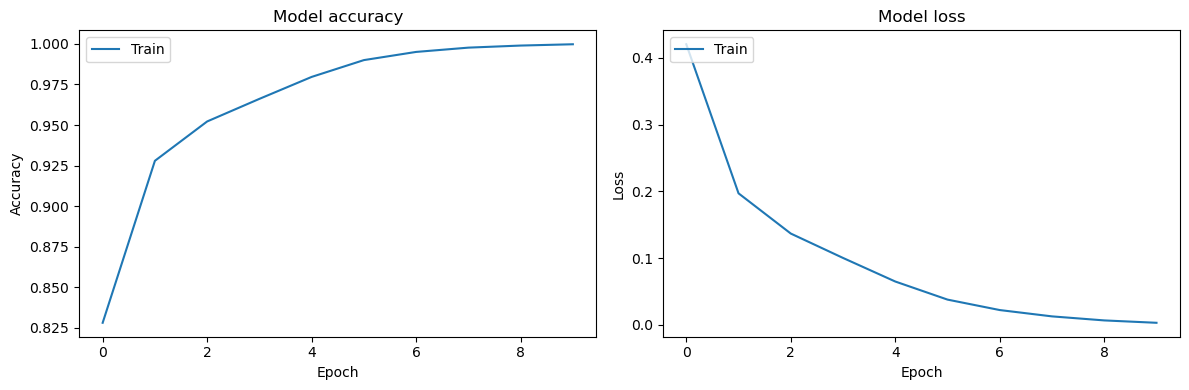

In [49]:
# Plot the training history
plot_history(history)

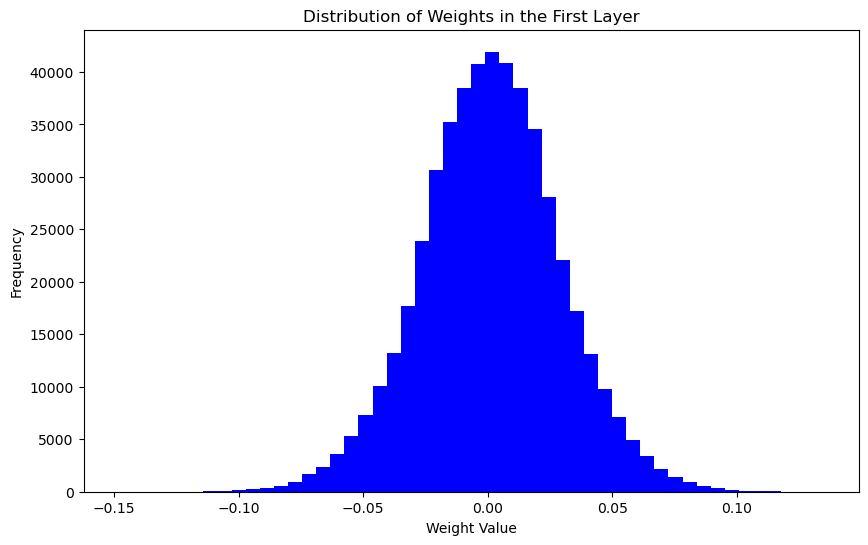

In [50]:
# Plot the weights of the first layer
plot_weights(model)

In [51]:
def main_menu():
    print("Sentiment Analysis Menu")
    print("1. Classify a Review")
    print("2. Plot Training History")
    print("3. Plot Model Weights")
    print("4. K-means Clustering of Reviews")
    print("5. Exit")
    return input("Enter your choice: ")

Sentiment Analysis Menu
1. Classify a Review
2. Plot Training History
3. Plot Model Weights
4. K-means Clustering of Reviews
5. Exit
Clustering Positive Reviews


c:\Users\HP\anaconda32\envs\iit_AIML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


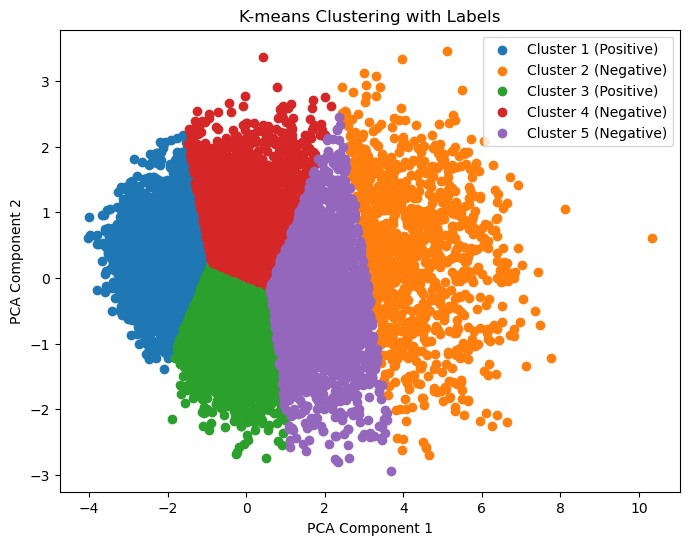

Clustering Negative Reviews


c:\Users\HP\anaconda32\envs\iit_AIML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


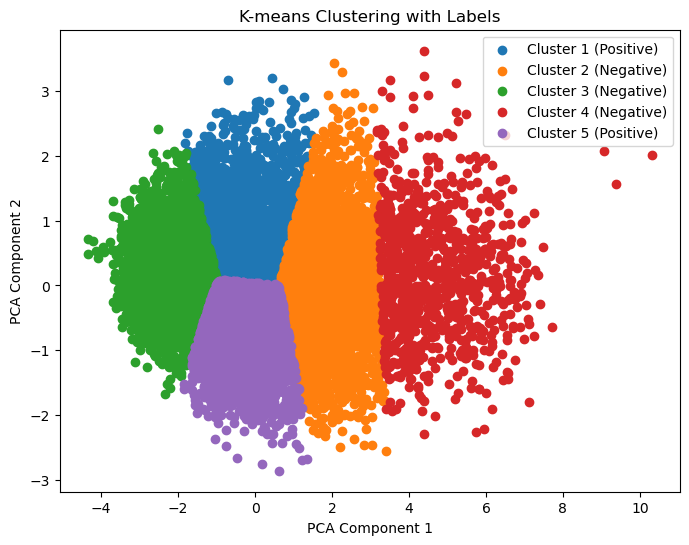

Sentiment Analysis Menu
1. Classify a Review
2. Plot Training History
3. Plot Model Weights
4. K-means Clustering of Reviews
5. Exit
1/1 [==============================] - 0s 53ms/step
User Review:the movie was amazing the ending was sad but i loved it
Sentiment: Negative
Sentiment Analysis Menu
1. Classify a Review
2. Plot Training History
3. Plot Model Weights
4. K-means Clustering of Reviews
5. Exit
Exiting the program.


In [55]:
while True:
    choice = main_menu()
    if choice == '1':
        review = input("Enter a review: ")
        sentiment = classify_review(model, review, word_index)
        print(f'User Review:{review}')
        print(f'Sentiment: {sentiment}')
    elif choice == '2':
        plot_history(history)
    elif choice == '3':
        plot_weights(model)
    elif choice == '4':
        
        # Separate positive and negative reviews based on predictions
        positive_reviews = Xtest[ypred.flatten() == 1]
        negative_reviews = Xtest[ypred.flatten() == 0]
        
        print("Clustering Positive Reviews")
        kmeans_clustering(positive_reviews)
        
        print("Clustering Negative Reviews")
        kmeans_clustering(negative_reviews)
    elif choice == '5':
        print("Exiting the program.")
        break
    else:
        print("Invalid choice, please try again.")
        
        

In [ ]:
# Example usage of the classify_review function
review = "The movie was bad but the actors were doing great acting"
sentiment = classify_review(model, review, word_index)
print(f'Review: {review}')
print(f'Sentiment: {sentiment}')

1/1 [==============================] - 0s 37ms/step
Review: The movie was bad but the actors were doing great acting
Sentiment: Positive
